In [1]:
#Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.svm import SVR

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [80]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.metrics import classification_report, precision_recall_curve, auc

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [9]:
#Read file

raw_df = pd.read_csv('C:/Users/airshu23/Desktop/Capstone2/ICPSR_20520/DS0001/Data.tsv', sep='\t')

C:\Users\airshu23\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,16,17,19,20,22,23,24,25,26,52,68,102,108,116,118,120,122,124,130,136,137,138,523,525,543,546,612,664) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
print (raw_df.shape)

print (raw_df.columns)


(5262, 665)
Index(['CASEID', 'V1', 'V2', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11',
       ...
       'V448G', 'V448H', 'V448I', 'V448J', 'V448K', 'V448L', 'V448M', 'V448N',
       'V449', 'V450'],
      dtype='object', length=665)


In [11]:
raw_df.head()

,CASEID,V1,V2,V4,V5,V7,V8,V9,V10,V11,...,V448G,V448H,V448I,V448J,V448K,V448L,V448M,V448N,V449,V450
0,1,257,1,7,8,1,,44,85,,...,0,0,0,0,0,0,0,0,2,13
1,2,2347,1,13,9,1,,102,,,...,0,0,0,0,0,0,0,0,3,12
2,3,860,1,12,9,2,1,78,69,1,...,1,1,1,0,0,0,0,0,2,2
3,4,5178,3,20,9,1,,82,78,1,...,0,0,0,0,0,0,1,0,1,5
4,5,1984,1,12,9,1,,101,78,2,...,0,0,1,1,0,0,1,0,1,4


In [12]:
# Establish index to CASEID
raw_df.set_index('CASEID', inplace = True)

In [13]:
#testing how blank values are represented
print (type(raw_df.loc[1, 'V8']))

<class 'str'>


In [14]:
print (raw_df['V8'][5] == ' ')     ## one empty space

True


In [15]:
# copy into new dataframe for modification
df = raw_df.copy()

In [16]:
# get columns for entire dataset
variables = list(df.columns)


## Data Wrangling

In [17]:
# convert all entries to string so that the function in the next cell runs properly
df[variables] = df[variables].astype(str)

In [18]:
#check for alphabet in column values
def check(series):
    
    if series.str.contains('[a-z]', regex = True).sum() > 0:
        return True
    return False

# list of columns to drop from df
dropped = []


In [19]:
# gather all columns with non-digit strings (a-z)
for var in variables:
    if check(df[var]) == True:
        dropped.append(var)

In [20]:
print(dropped)

['V401A', 'V401B', 'V402B', 'V404A', 'V407B', 'V408F', 'V408I', 'V408L', 'V408O', 'V409B', 'V409C', 'V410', 'V410B', 'V414A1', 'V415A1', 'V416A', 'V417A', 'V418A', 'V425A', 'V427A', 'V436A', 'V438A', 'V439A', 'V439B', 'V443A']


In [21]:
# remove variables with alphabet characters
df.drop(dropped, inplace = True, axis=1)


In [22]:
remaining_columns = list(df.columns)

In [23]:
# get index of first year 2005 follow-up variable
first_2005 = remaining_columns.index('V400')

# get index of last year 2005 follow-up variable
last_2005 = remaining_columns.index('V450')

In [24]:
#all variables from 2005 followup
variables_2005 = set(remaining_columns[first_2005:last_2005+1])

In [25]:
#variables to keep from 2005 followup
#V411 - work status
#v415E - job prestige score
#V421 - total individual monthly earnings
#V422 - total household income/year
#v426A - expected occupation (at age 30) prestige score

keep_2005 = set(['V411', 'V415E', 'V421', 'V422', 'V426A', 'V448M'])

In [26]:
# remove 2005 variables except V411, V415E, V421, V426A, V448M
drop_2005 = list(variables_2005.difference(keep_2005))

In [27]:
#drop from column headers above
df1 = df.drop(drop_2005, axis=1)

print (df1.shape)


(5262, 545)


In [28]:
df1.head(5)

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,C17,C18,C19,C20,V411,V415E,V421,V422,V426A,V448M
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1,,44,85,,1,...,3.3,5,2,,2,57,1800,7,,0
2,2347,1,13,9,1,,102,,,1,...,3.3,4.67,1.33,3,8,,850,2,,0
3,860,1,12,9,2,1,78,69,1,1,...,3.6,1.67,2,2,1,34,1054,8,56,0
4,5178,3,20,9,1,,82,78,1,1,...,,,,,3,,1900,9,51,1
5,1984,1,12,9,1,,101,78,2,1,...,4,3.67,1.33,2,1,51,5000,6,,1


In [29]:
#get columns from df1

cols = list(df1.columns)

# convert entries to numeric
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')


In [30]:
df1.head()

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,C17,C18,C19,C20,V411,V415E,V421,V422,V426A,V448M
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1.0,NaN,44.0,85.0,NaN,1.0,...,3.3,5.00,2.00,NaN,2.0,57.0,1800.0,7.0,NaN,0.0
2,2347,1,13,9,1.0,NaN,102.0,NaN,NaN,1.0,...,3.3,4.67,1.33,3.0,8.0,NaN,850.0,2.0,NaN,0.0
3,860,1,12,9,2.0,1.0,78.0,69.0,1.0,1.0,...,3.6,1.67,2.00,2.0,1.0,34.0,1054.0,8.0,56.0,0.0
4,5178,3,20,9,1.0,NaN,82.0,78.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,NaN,1900.0,9.0,51.0,1.0
5,1984,1,12,9,1.0,NaN,101.0,78.0,2.0,1.0,...,4.0,3.67,1.33,2.0,1.0,51.0,5000.0,6.0,NaN,1.0


In [31]:
# remove rows that do not have entries for V421 (total monthly earnings)

df2 = df1[pd.notnull(df1['V421'])]

# removing outlier salaries for scatterplot
df2_mod = df2[df2['V421'] < 7500]

In [32]:
# remove rows that do not have entries for V411 (work status)

df3 = df1[pd.notnull(df1['V411'])]
print(df3.shape)

(3299, 545)


## Exploratory Data Analysis


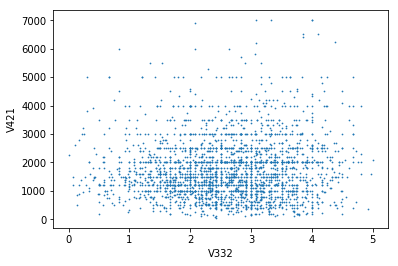

In [33]:
#gpa vs monthly earnings later in life
ax1 = df2_mod.plot.scatter(x='V332', y='V421', s=0.5)

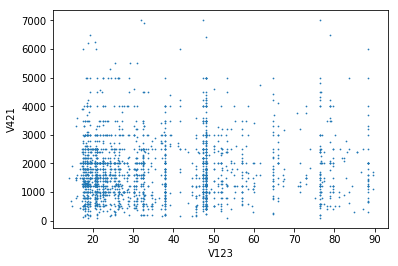

In [34]:
#father's SEI (socio-economic index) score vs monthly earnings

ax2 = df2_mod.plot.scatter(x='V123', y='V421', s=0.5)

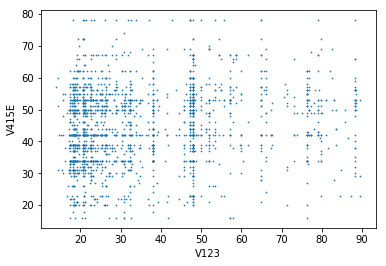

In [35]:
#father's SEI (socio-economic index) score vs current job prestige score

ax2 = df1.plot.scatter(x='V123', y='V415E', s=0.5)

In [36]:
#public versus private - median earnings

school_type = df1.groupby('C2').agg({'V421':'median'})

In [37]:
school_type.index = ['Public School', 'Private School']

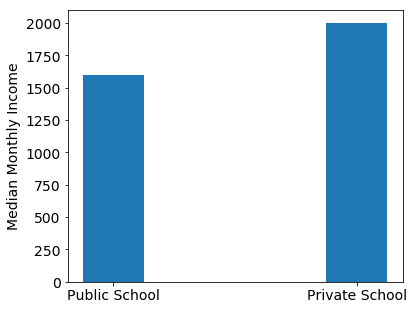

In [38]:
plt.figure(figsize=(6,5))
plt.bar(school_type.index, school_type['V421'].values, width = .25)
plt.ylabel('Median Monthly Income', fontsize = 14)
plt.xticks(fontsize= 14 )
plt.yticks(fontsize= 14 )
plt.show()

In [39]:
# Safety at school 1 - low, 4 - high
school_safety = df1.groupby('V211').agg({'V421':'median'})

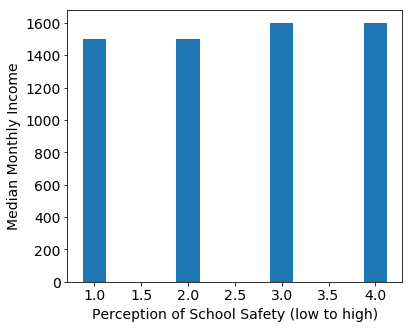

In [40]:
#scatterplot of respondent's 

plt.figure(figsize=(6,5))
plt.bar(school_safety.index, school_safety['V421'].values, width = .25)
plt.ylabel('Median Monthly Income', fontsize = 14)
plt.xlabel('Perception of School Safety (low to high)', fontsize = 14)
plt.xticks(fontsize= 14 )
plt.yticks(fontsize= 14 )
plt.show()

## Pre-processing and Feature Selection

In [41]:
# Examine missing values

test = df2.isna().sum() / len(df2)

In [42]:
#all columns where number of missing values exceed 50%
testing = test[test>=0.5]


In [43]:
below50 = list(testing.index.values)

In [44]:
dropped = below50 + ['V411', 'V415E', 'V422', 'V426A', 'V448M']

In [45]:
print(dropped)

['V8', 'V10', 'V14', 'V34A', 'V34B', 'V39A', 'V39B', 'V46', 'V47', 'V48', 'V74A', 'V74B', 'V74C', 'V74D', 'V74E', 'V74G', 'V74H', 'V74I', 'V74K', 'V74L', 'V74M', 'V74N', 'V74O', 'V74P', 'V74Q', 'V74R', 'V74S', 'V74T', 'V74U', 'V87', 'V221', 'V246', 'V247', 'V248', 'V287', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P24', 'P25', 'P26B', 'P27B', 'P29A', 'P29B', 'P29C', 'P29D', 'P30', 'P32', 'P33A', 'P35', 'P36', 'P37', 'P38', 'P39A', 'P40', 'P41A', 'P42', 'P43A', 'P44', 'P45A', 'P45B', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P53A', 'P53B', 'P53C', 'P53D', 'P54', 'P55', 'P56', 'P59A', 'P59B', 'P59C', 'P61', 'P63', 'P64', 'P65', 'P67', 'P68A', 'P69', 'P70', 'P71', 'P72', 'P74A', 'P74B', 'P74C', 'P75A', 'P75B', 'P75C', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81', 'P82', 'P83', 'P85', 'P86', 'P88', 'P90', 'P91', 'P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P122', 'P124', 'P130A', 'P130B', 'P130C', 'P130D', 'P130E', 'P134', 'P138', 'P139', 'P142', 'P143', 'P144', 'V411', 'V4

In [46]:
# dropping columns in list above
df2_vers1 = df2.drop(dropped, axis = 1)


# imputing values for missing entries
df2_vers2 = df2_vers1.fillna(df2_vers1.median())

# Standardizing values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df2_vers2)

#standardized dataframe
df2_vers3 = pd.DataFrame(scaled_values, columns = df2_vers2.columns)

In [47]:
# split into feature and target variable

X = df2_vers3.drop('V421', axis = 1)
y = df2_vers3['V421']

In [48]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

In [49]:
correlated_features = set()  
correlation_matrix = X_train.corr()

In [50]:
print (correlation_matrix.shape)

(409, 409)


In [51]:
#collecting highly correlated feature variables

for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [52]:
corr2 = list(correlated_features)

In [53]:
X_train.drop(corr2, axis = 1, inplace = True)  
X_test.drop(corr2, axis = 1, inplace = True)

C:\Users\airshu23\Anaconda3\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
print (X_train.shape)

(2082, 381)


In [55]:
# get most important attributes

selForestFit = ExtraTreesRegressor(n_estimators = 300, random_state= 27).fit(X_train, y_train)


In [56]:
importances = selForestFit.feature_importances_


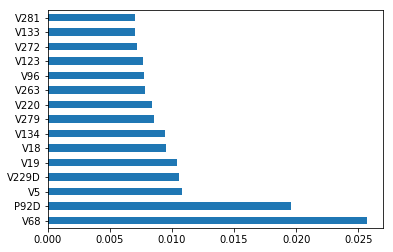

In [57]:
feat_importances = pd.Series(importances, index= X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Preliminary Model

In [58]:
# top 25 in terms of importance as derived from ExtraTreesRegressor
top = list(feat_importances.nlargest(50).index)

X_train_version1 = X_train[top]
X_test_version1 = X_test[top]

In [59]:
#instantiate random forest regressor
rf = RandomForestRegressor(max_depth = 5, random_state=23, n_estimators=500)

# Fit the regressor to the training data
rf.fit(X_train_version1, y_train)

# Compute and print R^2 
print("R^2: {}".format(rf.score(X_test_version1, y_test)))

R^2: 0.007549564349944249


## TRY --> RECURSIVE FEATURE ELIMINATION

In [60]:
rfe_estimator = SVR(kernel = 'linear')
selector = RFE(rfe_estimator, step=1) 


In [62]:
# selector.fit(X_train, y_train)

In [64]:
# selector.score(X_train, y_train)

In [63]:
# selector.n_features_

## Experiment with different target variable (binary)

In [65]:
#median of monthly income
cutoff = df1['V421'].quantile(.70)
print(cutoff)

2000.0


In [66]:
# new series indicating if monthly pay is above median
above_median = (df2_vers1['V421'] > cutoff).astype(int)

#split into train and test sets
feature_train, feature_test, target_train, target_test = train_test_split(X, above_median, test_size=0.20, random_state=71)

In [67]:
# remove highly correlated features in list corr2

feature_train.drop(corr2, axis = 1, inplace = True)  
feature_test.drop(corr2, axis = 1, inplace = True)

C:\Users\airshu23\Anaconda3\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [68]:
# instantiate model
logistic_estimator = LogisticRegression()

#instantiate recursive feature elimination
rfe_logistic = RFE(logistic_estimator, step=1) 

In [69]:
rfe_logistic.fit(feature_train, target_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [70]:
# R^2 on training set
rfe_logistic.score(feature_train, target_train)

0.7694524495677233

In [72]:
# make class predictions for the testing set
y_pred = rfe_logistic.predict(feature_test)

print(accuracy_score(target_test, y_pred))

0.690978886756238


In [73]:
print(confusion_matrix(target_test, y_pred))

print(classification_report(target_test, y_pred))

[[311  64]
 [ 97  49]]
             precision    recall  f1-score   support

          0       0.76      0.83      0.79       375
          1       0.43      0.34      0.38       146

avg / total       0.67      0.69      0.68       521



In [74]:
# of best features

rfe_logistic.n_features_

190

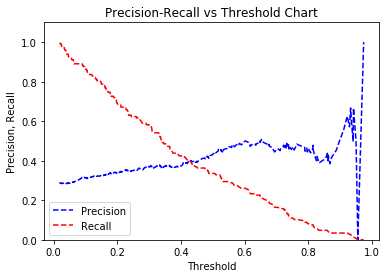

In [93]:
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
probs_y=rfe_logistic.predict_proba(feature_test) 
  
precision, recall, thresholds = precision_recall_curve(target_test, probs_y[:, 1]) 

#retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[1:], "b--", label="Precision")
plt.plot(thresholds, recall[1:], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1.1])
plt.show()

### TRY Gradient Boosting

In [163]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,  max_depth=3, random_state=23).fit(feature_train, target_train)

In [164]:
clf.score(feature_test, target_test)

0.6813819577735125

In [170]:
#get predictions on test test
y_pred_grad = clf2.predict(feature_test)

In [171]:
print(confusion_matrix(target_test, y_pred_grad))

print(classification_report(target_test, y_pred_grad))

[[369   6]
 [139   7]]
             precision    recall  f1-score   support

          0       0.73      0.98      0.84       375
          1       0.54      0.05      0.09       146

avg / total       0.67      0.72      0.63       521



### TRY ADABOOST classification

In [166]:
clf2 = AdaBoostClassifier(n_estimators=200, learning_rate=0.1).fit(feature_train, target_train)
clf2.score(feature_test, target_test)

0.7216890595009597

In [168]:
#get predictions on test test

y_pred_ada = clf2.predict(feature_test)

In [169]:
print(confusion_matrix(target_test, y_pred_ada))

print(classification_report(target_test, y_pred_ada))

[[369   6]
 [139   7]]
             precision    recall  f1-score   support

          0       0.73      0.98      0.84       375
          1       0.54      0.05      0.09       146

avg / total       0.67      0.72      0.63       521

